In [3]:
import importlib
import itertools
import numpy as np

import visualizers
from geometric_types import Point
import kd_tree as kd_tree_module
from quadtree import Quadtree
importlib.reload(visualizers)
importlib.reload(kd_tree_module)

def conv_to_np_float64_points(points: list[list]) -> list[Point]:
    new_points = []
    for p in points:
        new_points.append(list(map(np.float64, p)))

    return new_points

A, B = (0, 0), (100, 100)

<IPython.core.display.Javascript object>


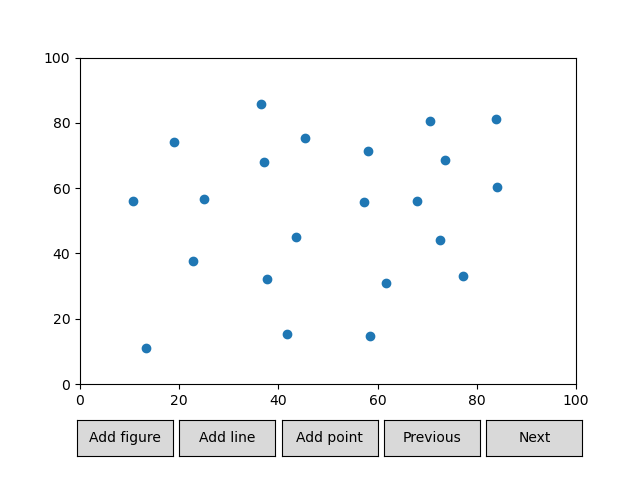

(0.0, 100.0)

In [8]:

%matplotlib notebook

input_plot = visualizers.Plot()
input_plot.draw()
ax = visualizers.plt.gca()
ax.set_xlim((A[0], B[0]))
ax.set_ylim((A[1], B[1]))

## Reset input points

In [9]:
inp_points = []

## Get input points from plot above

In [10]:
inp_points = [*inp_points, *itertools.chain(*map(lambda coll: coll.points, input_plot.get_added_points()))]

## KD-Tree

### Build KD-Tree

<IPython.core.display.Javascript object>


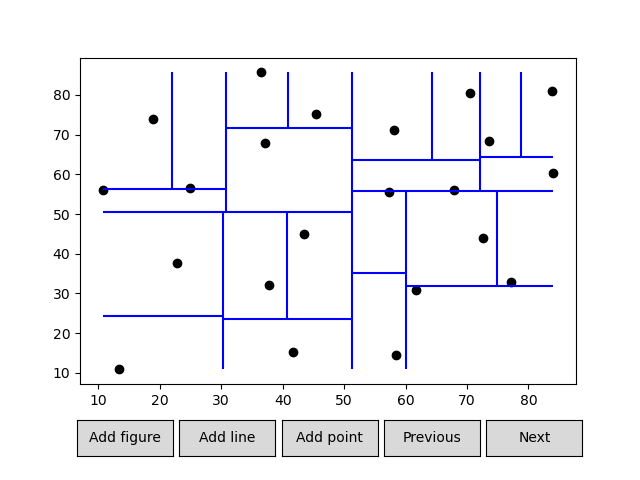

In [16]:
kd_tree = kd_tree_module.KDTree(2, conv_to_np_float64_points(inp_points), True)

if kd_tree.visualizer is not None:
    tree_build_plot = kd_tree.visualizer.get_tree_building_plot()
    tree_build_plot.draw()


### Query KD-Tree

[[13.300151209677416, 10.924096200980383], [41.72757056451613, 15.213311887254893]]


<IPython.core.display.Javascript object>


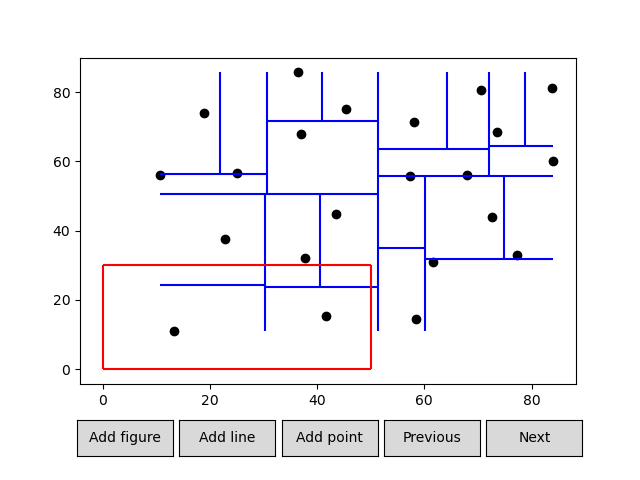

In [12]:
print(kd_tree.find_points_in_area(([np.float64(0), np.float64(0)], [np.float64(50), np.float64(30)])))
if kd_tree.visualizer is not None:
    res_plot = kd_tree.visualizer.get_searching_plot()
    res_plot.draw()


## Quadtree

### Build Quadtree

In [13]:
quadtree = Quadtree(inp_points, (A, B), 4, True)

### Query QuadTree

In [17]:
boundary = ((2, 2), (90, 20))
for point in quadtree.query_range(boundary):
    print(point)

(58.461441532258064, 14.60056678921568)
(41.72757056451613, 15.213311887254893)
(13.300151209677416, 10.924096200980383)


### visualize QuadTree operations

<IPython.core.display.Javascript object>


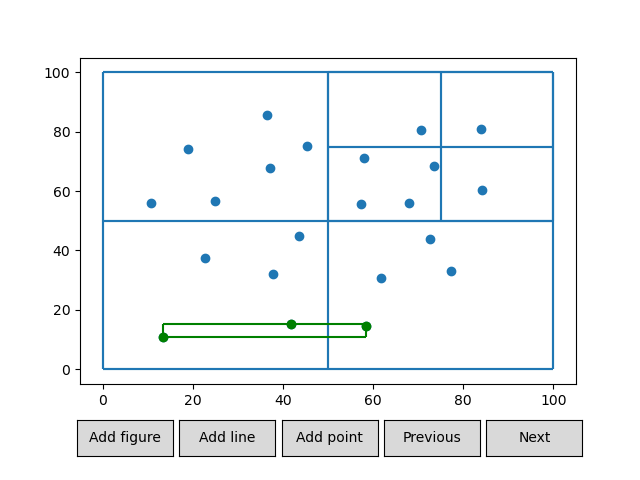

In [15]:
plot = quadtree.visualizer.create_plot()
plot.draw()